In [1]:
import keras, tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
from IPython import display
from pathlib import Path
import os
from keras.models import load_model

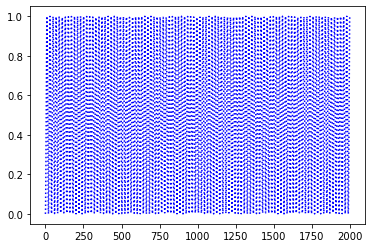

(1, 2000, 1)


In [5]:
model_dir = 'C:/Users/rando/Downloads/stimuli_response/models/'
file = 'C:/Users/rando/Downloads/stimuli_response/920nm_100mW_bin4x_100msExp_sinSquare_2secPeriod_1.csv'



stimuli = []
stimuli_data = pd.read_csv(file, header = None)
stimuli_data_tuple = stimuli_data.to_numpy()
stimuli_data_array = np.asarray(stimuli_data_tuple)
stimuli.append(stimuli_data_array[:,0])
stimuli = np.asarray(stimuli)[0,:]
plt.plot(np.arange(stimuli.shape[0]),stimuli, color = 'b', linestyle='dotted')
plt.show()

stimuli = np.reshape(stimuli, (1,stimuli.shape[0], 1))
print(stimuli.shape)


1/1 [==============================] - 1s 749ms/step
(1, 2000)


ValueError: x and y must have same first dimension, but have shapes (2000,) and (1995,)

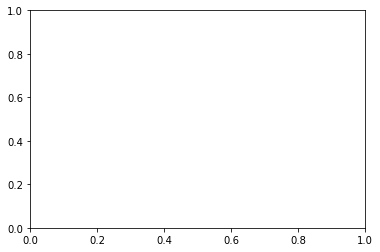

In [8]:
model = load_model(model_dir + 'ROI2.h5')

prediction = model.predict(stimuli)[:,:,0]
print(prediction.shape)
time = np.arange(prediction.shape[1])
data = prediction[0,:]    
gt = stimuli_data_array[:,1]

plt.plot(time[5:-5],data[5:-5], color = 'r')
plt.show()
plt.plot(time,gt, color = 'b')
plt.show()